In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Unsupervised Learning/Clustering/K-Means Clustering/iris.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
New_Data=data.drop(['species'],axis=1)
New_Data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


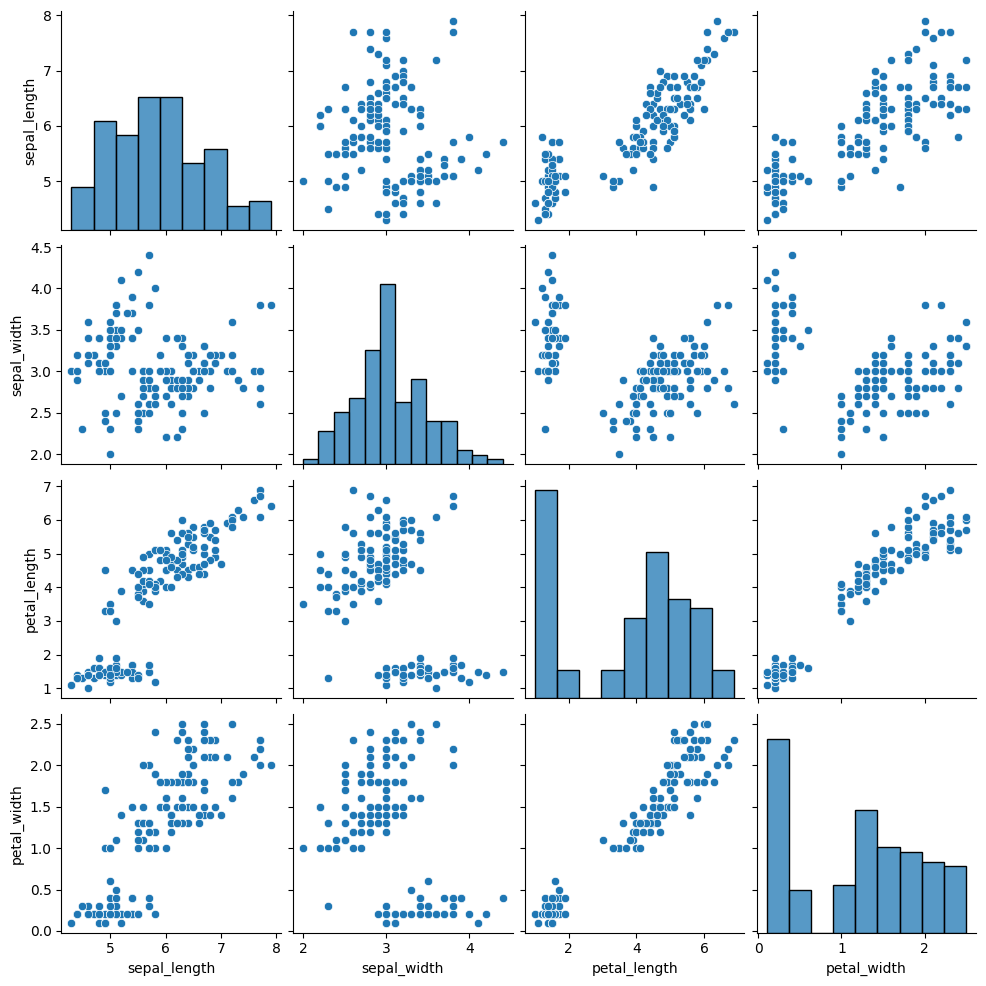

In [4]:
sns.pairplot(data=New_Data)
plt.savefig("assets/KMeansClustering2.jpg")

plt.show()


In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss=[]

for i in range(2,21):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(New_Data)
    wcss.append(km.inertia_)

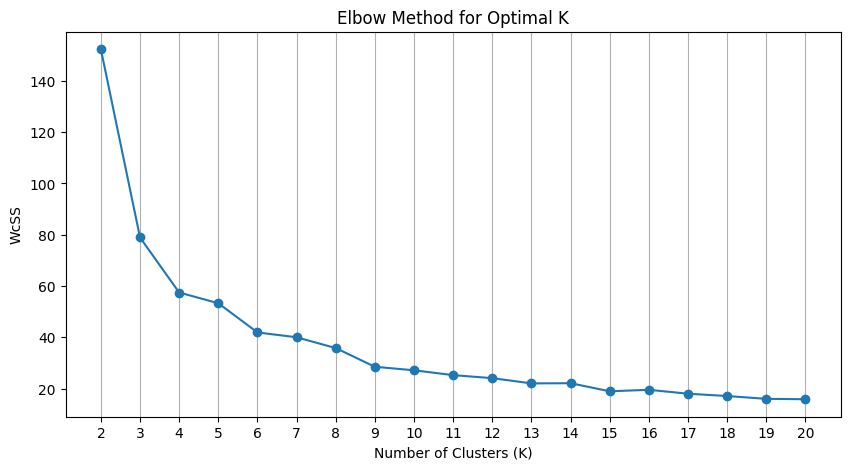

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss,marker="o")
plt.xticks([i for i in range(2,21)])
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WcSS")
plt.title("Elbow Method for Optimal K")
plt.grid(axis="x")
plt.savefig('assets/KmeansElbow.jpg')
plt.show()


In [8]:
kmc = KMeans(n_clusters=3, random_state=42)
New_Data['species'] = kmc.fit_predict(New_Data)  


In [9]:
New_Data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


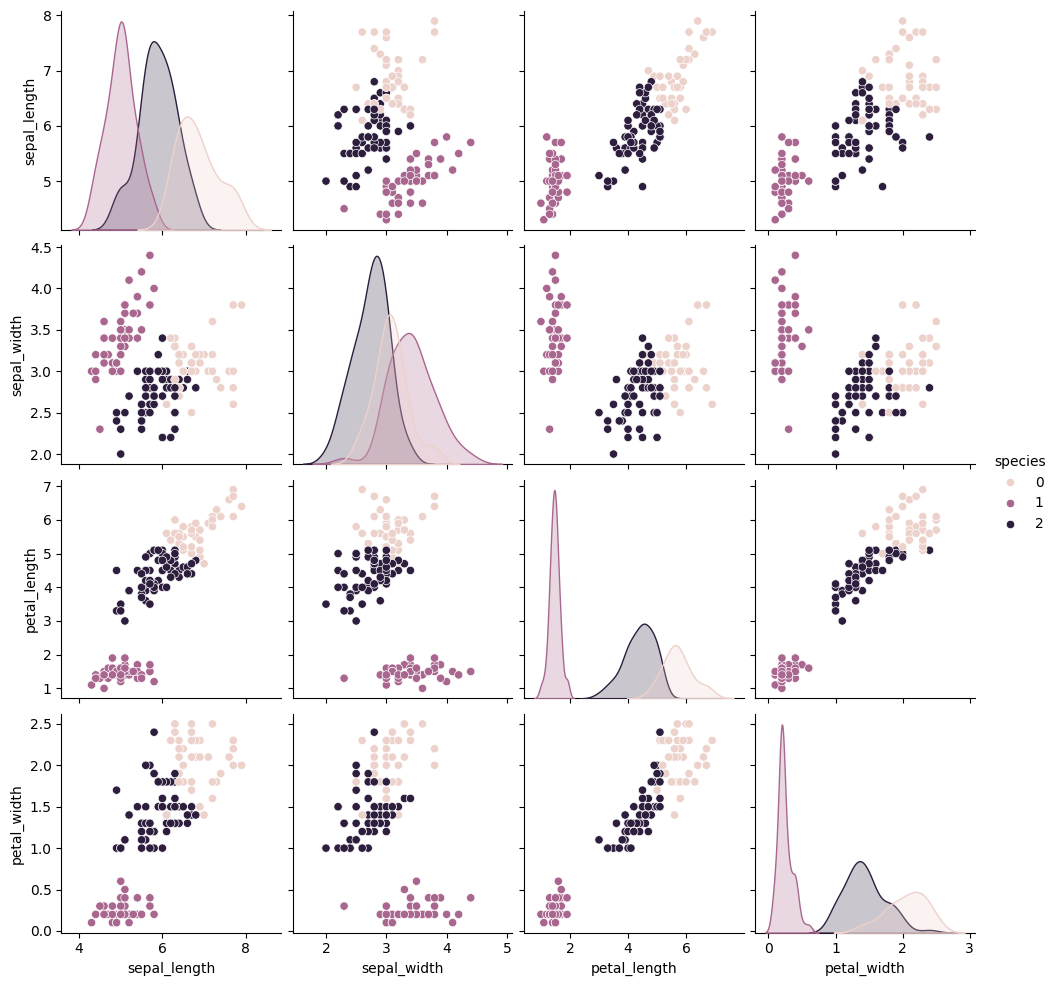

In [10]:
sns.pairplot(data=New_Data,hue='species')
plt.savefig("assets/KMeansClustering.jpg")
plt.show()

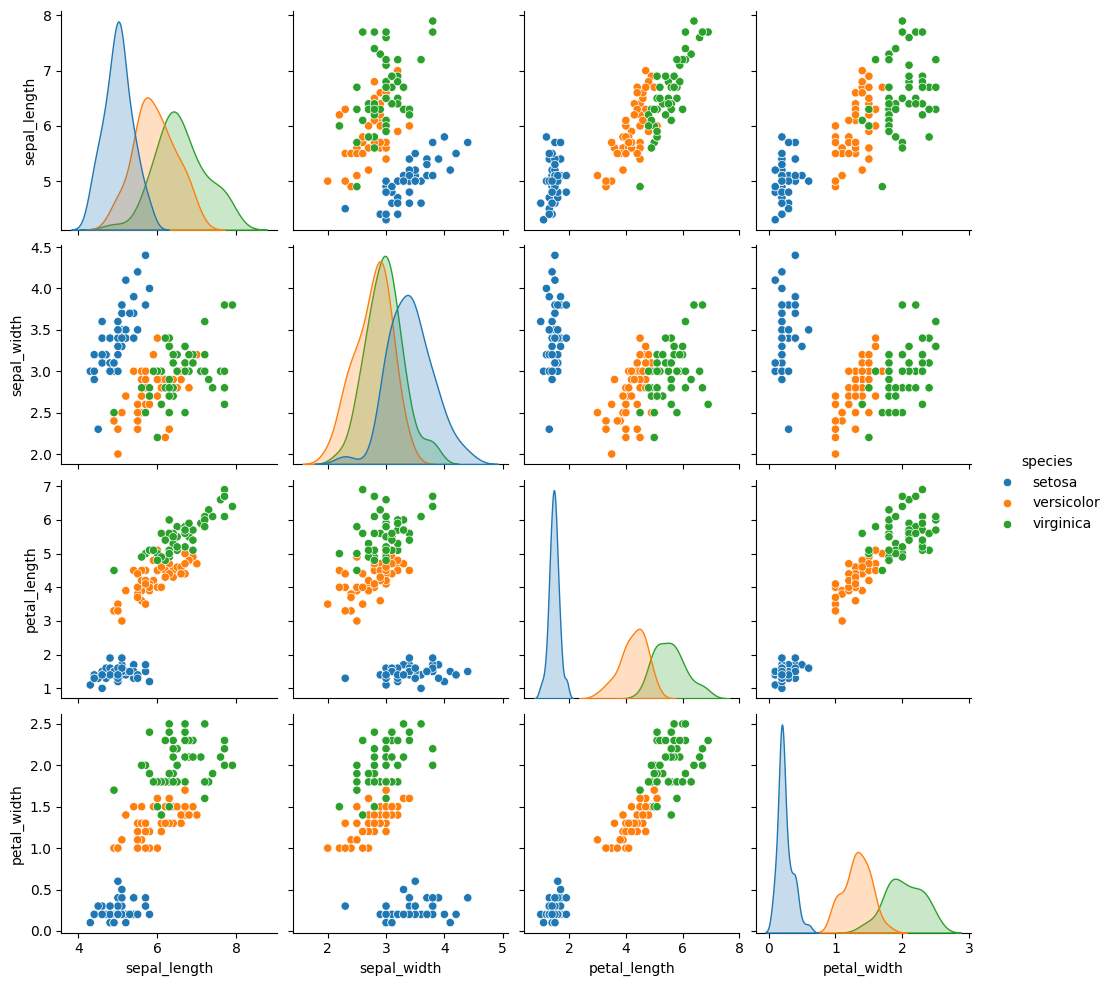

In [11]:
sns.pairplot(data=data,hue='species')

In [12]:
print(data.loc[0]==New_Data.loc[0])

sepal_length     True
sepal_width      True
petal_length     True
petal_width      True
species         False
Name: 0, dtype: bool


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lb=LabelEncoder()
lb.fit_transform(data['species'])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
New_Data['species'].value_counts()

species
2    61
1    50
0    39
Name: count, dtype: int64

In [16]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [18]:
ss=[]
no_c=[j for j in range(2,21)]
for i in range(2,21):
    kmm=KMeans(n_clusters=i)
    kmm.fit(New_Data)
    ss.append(silhouette_score(New_Data,kmm.labels_))

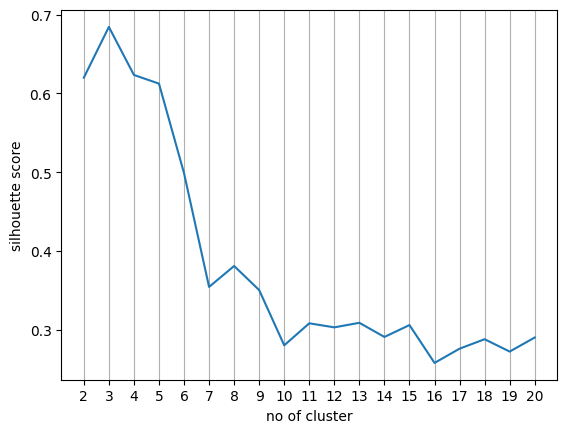

In [19]:
plt.plot(no_c,ss)
plt.xlabel("no of cluster")
plt.ylabel("silhouette score")
plt.xticks(no_c)
plt.grid(axis='x')
plt.show()